# Assignment 6 - Numpy and Matplotlib
### Due Thursday October 12
Your assignment should be handed in as an ipython notebook checked into your github repository in a new folder named `assignment_6`. To download this assignment, your best option is to clone the original github repository for the course website:

```git clone https://github.com/rabernat/research_computing.git```

and then navigate to the `assignment` folder.

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [136]:
import numpy as np


#### 1.2 Use the shell command `curl` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

`$ curl -O http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k  100  140k    0     0   140k      0  0:00:01 --:--:--  0:00:01 1803k`


In [137]:
!curl -O http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  140k  100  140k    0     0  2268k      0 --:--:-- --:--:-- --:--:-- 2268k


#### 1.3 Load the data file

In [138]:
data = np.load('argo_float_4901412.npz')

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [139]:
data.keys()                                      # examine keys in data file
T, S, P = data['T'], data['S'], data['P']        # extract arrays
# T.min(), S.min(), P.min()
T = np.ma.masked_invalid(data['T'])              # create masked array to mask nan values
S = np.ma.masked_invalid(data['S'])              # for example, use T.min() to check for new minimum values
P = np.ma.masked_invalid(data['P'])

#### 1.5 Extract the date, lat, lon, and level arrays. 


In [140]:
date, lat, lon, levels = data['date'], data['lat'], data['lon'], data['levels']

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [141]:
for k,v in data.items():
    print(k,v.shape)

S (78, 75)
T (78, 75)
levels (78,)
lon (75,)
date (75,)
P (78, 75)
lat (75,)


**ANSWER:**
> T, S and P have 78 rows of data, with 75 columns per row

> date, lat and lon each have one row of 75 columns

> levels has one row of 78 columns

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [142]:
from matplotlib import pyplot as plt
%matplotlib inline

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

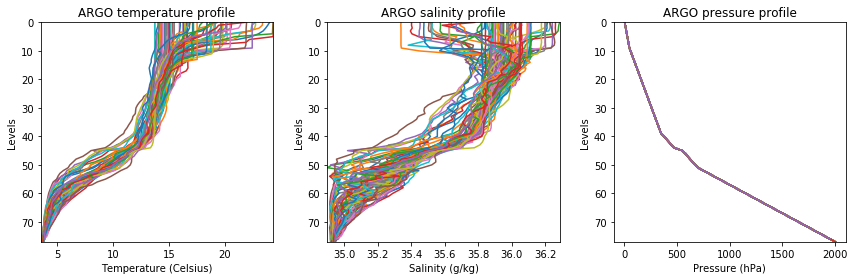

In [143]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1)
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1)
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1)

ax1.plot(T, levels);
ax2.plot(S, levels);
ax3.plot(P, levels);

ax1.set_xlim([T.min(), T.max()]);
ax2.set_xlim([S.min(), S.max()]);
ax3.set_ylim([P.min(), P.max()]);
ax1.set_ylim([levels.max(), levels.min()]);
ax2.set_ylim([levels.max(), levels.min()]);
ax3.set_ylim([levels.max(), levels.min()]);

ax1.set_xlabel('Temperature (Celsius)');
ax1.set_ylabel('Levels');                 # units for levels, metres perhaps?
ax1.set_title('ARGO temperature profile');
ax2.set_xlabel('Salinity (g/kg)');
ax2.set_ylabel('Levels');
ax2.set_title('ARGO salinity profile');
ax3.set_xlabel('Pressure (hPa)');
ax3.set_ylabel('Levels');
ax3.set_title('ARGO pressure profile');

plt.tight_layout()

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [144]:
T_mean = []
S_mean = []
P_mean = []

T_std = []
S_std = []
P_std = []

for i in range(0, len(T)):
    T_mean.append(T[i].mean())
    S_mean.append(S[i].mean())
    P_mean.append(P[i].mean())
    T_std.append(T[i].std())
    S_std.append(S[i].std())
    P_std.append(P[i].std())
  

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

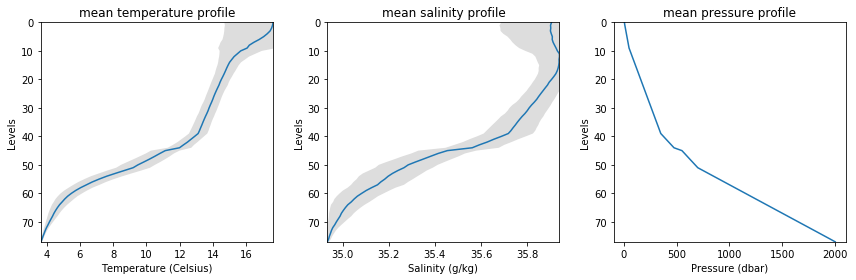

In [145]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1)
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1)
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1)

ax1.fill_betweenx(levels,np.add(T_mean,T_std),np.subtract(T_mean,T_std),facecolor='#dddddd')
ax2.fill_betweenx(levels,np.add(S_mean,S_std),np.subtract(S_mean,S_std),facecolor='#dddddd')
ax3.fill_betweenx(levels,np.add(P_mean,P_std),np.subtract(P_mean,P_std),facecolor='#dddddd')

ax1.plot(T_mean, levels);
ax2.plot(S_mean, levels);
ax3.plot(P_mean, levels);

ax1.set_xlim([min(T_mean), max(T_mean)]);
ax2.set_xlim([min(S_mean), max(S_mean)]);
ax3.set_ylim([min(P_mean), max(P_mean)]);
ax1.set_ylim([levels.max(), levels.min()]);
ax2.set_ylim([levels.max(), levels.min()]);
ax3.set_ylim([levels.max(), levels.min()]);
 
ax1.set_xlabel('Temperature (Celsius)');
ax1.set_ylabel('Levels');                    # units for levels, metres perhaps?
ax1.set_title('mean temperature profile');
ax2.set_xlabel('Salinity (g/kg)');
ax2.set_ylabel('Levels');
ax2.set_title('mean salinity profile');
ax3.set_xlabel('Pressure (dbar)');
ax3.set_ylabel('Levels');
ax3.set_title('mean pressure profile');
    
plt.tight_layout()

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [146]:
T_meanDate = []
S_meanDate = []
P_meanDate = []
for i in range(0,len(date)):
    T_meanDate.append(np.mean(T[:,i]))
    S_meanDate.append(np.mean(S[:,i]))
    P_meanDate.append(np.mean(P[:,i]))

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

In [147]:
date = data['date']
from datetime import datetime
dates = np.array([datetime.fromtimestamp(d.astype('int64')/1e9) for d in date])

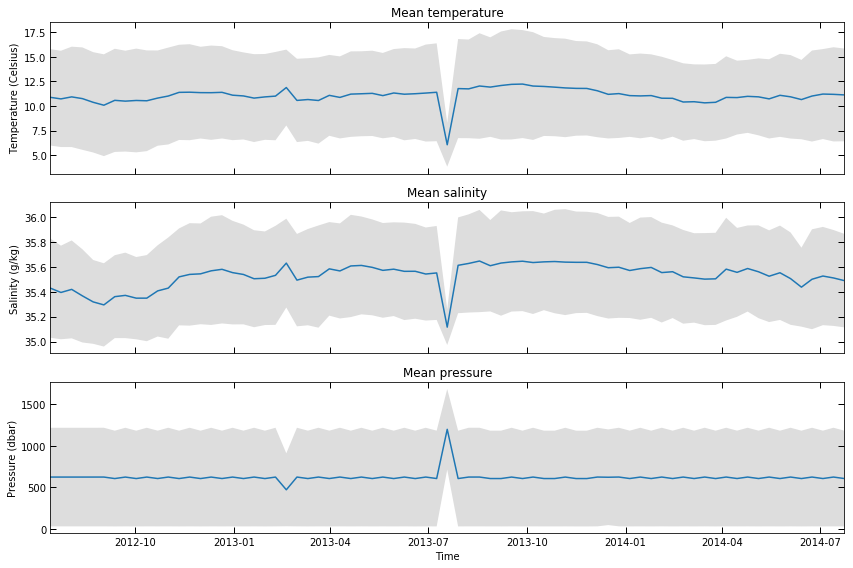

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,8),nrows=3, sharex=True)

ax1.plot(dates, T_meanDate);
ax2.plot(dates, S_meanDate);
ax3.plot(dates, P_meanDate);

T_stdDate = []
S_stdDate = []
P_stdDate = []
for i in range(0,len(date)):
    T_stdDate.append(np.std(T[:,i]))
    S_stdDate.append(np.std(S[:,i]))
    P_stdDate.append(np.std(P[:,i]))
    
ax1.fill_between(dates,np.add(T_meanDate,T_stdDate),np.subtract(T_meanDate,T_stdDate),facecolor='#dddddd') #errors
ax2.fill_between(dates,np.add(S_meanDate,S_stdDate),np.subtract(S_meanDate,S_stdDate),facecolor='#dddddd')
ax3.fill_between(dates,np.add(P_meanDate,P_stdDate),np.subtract(P_meanDate,P_stdDate),facecolor='#dddddd')
    
ax1.set_ylabel('Temperature (Celsius)')
ax1.set_title('Mean temperature')
ax2.set_ylabel('Salinity (g/kg)')
ax2.set_title('Mean salinity')
ax3.set_ylabel('Pressure (dbar)')
ax3.set_title('Mean pressure')
ax3.set_xlabel('Time')

ax1.tick_params(direction='in', length=6, width=1,top=1,right=1)
ax2.tick_params(direction='in', length=6, width=1,top=1,right=1)
ax3.tick_params(direction='in', length=6, width=1,top=1,right=1)       # point ticks inwards, and surround box

ax1.set_xlim([min(dates),max(dates)])                                  # set x limits to data range

plt.tight_layout()

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

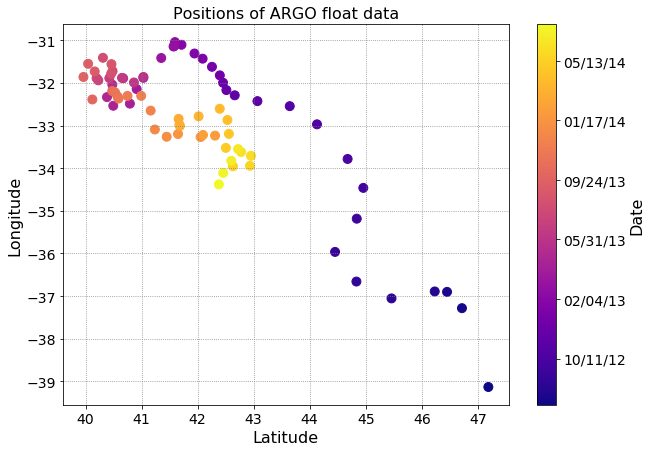

In [149]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
cax = ax.scatter(lat,lon, s=80, c=date,cmap='plasma')

ax.set_xlabel('Latitude',FontSize=16)
ax.set_ylabel('Longitude',FontSize=16)
ax.tick_params(labelsize=14)
ax.set_title('Positions of ARGO float data',FontSize=16)

cbar = fig.colorbar(cax)    
# Below, I struggled to get the original tick labels in float form, and also the 1e18 factor doesn't carry forward!
# So this bit is not perfect
originalLabel = [(float(i.get_text())*1e18) for i in cbar.ax.get_yticklabels()]

dateticks = [datetime.fromtimestamp(originalLabel[d]/1e9) for d in range(0,len(originalLabel))]
newLabel = []
for i in range(0,len(dateticks)):
    dateticksFormat = datetime.strptime((str(dateticks[i])), '%Y-%m-%d %H:%M:%S')
    newLabel.append(datetime.strftime(dateticksFormat, '%m/%d/%y'))

cbar.ax.set_yticklabels(newLabel)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Date',FontSize=16)
plt.grid()
ax.grid(color='gray', linestyle=':')

## 2 Matrix  multiplication revisited
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 
Use the same three loop formulation from Assignment 5. If you want, you can replace the innermost loop with the sum operation or a matrix dot product since that may speed things up a bit.

In [187]:
def myMatrixMultiply(X=np.array([[1,0,0], [0,1,0], [0,0,1]]),Y=np.array([[2,2,2],[2,2,2],[2,2,2]])):
    product = np.zeros((len(X),len(Y[0])))
    for i in range(0,len(X)):
        for j in range(0,len(Y[0])):
            product[i,j] = X[i][:].dot(Y[:][j])
    print(product)
    
myMatrixMultiply()     

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [153]:
ones

3

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

In [154]:
Y=[[1,5,6],[1,2,5],[7,5,6]]
len(X[0])

3

Now time how long it takes for n = 1000

When I ran this on my Mac laptop and used Activity Monitor.app to view the CPU usage of Python, I noticed that it was using up to 400% of my CPU. My laptop has 4 processing cores, so 400% means it was using all four cores to compute the matrix product. In other words, it was using parallel processing to speed up the calculations. Numpy uses some highly optimized versions of the BLAS linear algebra routines that are part of the Intel Math Kernel Library. By default, it  uses a multi-threaded version of the MKL to take advantage of the many processing cores available on modern computers. Let's turn off multithreading and see how much slower it runs. 

In your notebook type:
```
import mkl
mkl.set_num_threads(1)
```
Now rerun the n=1000 example using the `dot()` function.